In [2]:
import matplotlib.pyplot as plt
import shap
from chessplainer.wrapper import EngineWrapper, ChessExplainer
import chess


In [3]:
import matplotlib
import matplotlib.colors as colors

False


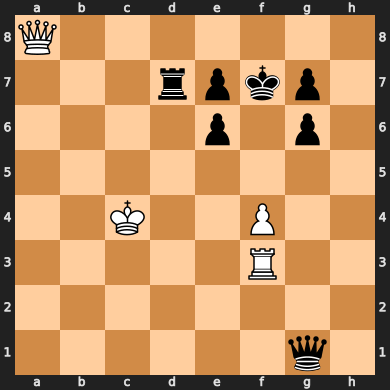

In [81]:
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1")  # black to move
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 1")  # white to move
board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")
board = chess.Board("5k2/4ppp1/8/8/2K5/5R2/8/8 w - - 0 1")
board = chess.Board("7r/R5pk/7p/2b5/3Q4/1P6/1Pq3PP/6K1 w - - 0 1")
board = chess.Board("rk2K3/NPR5/8/8/8/8/8/4Q3 w - - 0 1")
board = chess.Board("2n3k1/6pp/p3pp2/Pp1p4/1P1P3P/4P1P1/2r2P2/4RBK1 w - - 0 1")
board = chess.Board("3k4/8/4p1p1/1p1pP1Pp/1PpPn2P/2P1B2R/1K6/5r2 w - - 1 33")
board = chess.Board("8/4k2p/1p1p2p1/pr1Pp3/4P3/PP1K4/1R4PP/8 w - - 0 31")  # bad rook



board = chess.Board("8/4k3/8/8/1K6/8/8/8 w - - 0 1")
board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1")
#
board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
board = chess.Board("Q7/4pkp1/3rp1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
#
board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5P2/5R2/6q1 w - - 0 1")

board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1")
#
#
#
#
# board = chess.Board("Q7/4pkp1/4p1p1/8/2K5/5R2/8/8 w - - 0 1")
# board = chess.Board("2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1") # reddit

# board = chess.Board("5K2/8/8/P3pkp1/p6p/4P2P/1nN5/8 w - - 0 1")
# board = chess.Board("8/6q1/8/8/8/5k2/8/4K3 b - - 0 1")  # black to mate
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")  # white to mate
# board = chess.Board("3q1k2/8/8/8/8/8/2R5/2K5 w - - 0 1")
# board = chess.Board("3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1")
# board = chess.Board("3q1k2/8/8/8/8/8/1RR5/2K5 w - - 0 1")
# board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1")
# board = chess.Board()
print(board.turn)
board

In [82]:
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=dict(time=5),
    predict_limit_kwargs=dict(time=0.1),
)

In [83]:
engine.fit([board])
engine.base_score_

array([[0.017, 0.983]])

In [84]:
chesshap = ChessExplainer(board, engine, explainer=shap.KernelExplainer)# , explainer_fit_kwargs=dict(algorithm="partition"))
print(chesshap.engine.base_score_)

[[0.017 0.983]]


In [85]:
chesshap.explain()

  0%|          | 0/1 [00:00<?, ?it/s]

.values =
array([[[-0.44327857,  0.44327857],
        [ 0.3081369 , -0.3081369 ],
        [-0.1608619 ,  0.1608619 ],
        [-0.05411071,  0.05411071],
        [-0.0679119 ,  0.0679119 ],
        [-0.34397143,  0.34397143],
        [-0.07087619,  0.07087619],
        [-0.07201905,  0.07201905],
        [ 0.42189286, -0.42189286]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

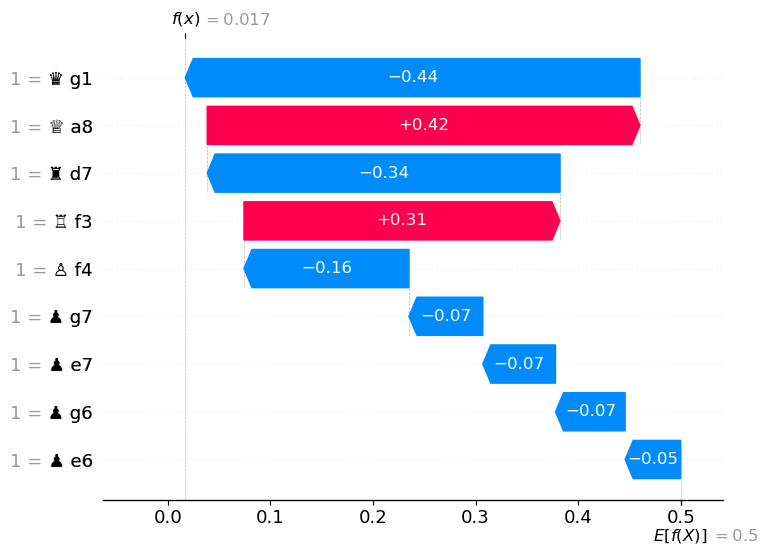

In [86]:
import matplotlib.pyplot as plt
chesshap.explanation_.feature_names = chesshap.feature_names
# chesshap.explanation_.feature_names = chesshap.df_["feature_name_display"].tolist()
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=14)

In [87]:
# chesshap.explainer_.expected_value, chesshap.engine.base_score_

In [88]:
chesshap.explanation_

.values =
array([[[-0.44327857,  0.44327857],
        [ 0.3081369 , -0.3081369 ],
        [-0.1608619 ,  0.1608619 ],
        [-0.05411071,  0.05411071],
        [-0.0679119 ,  0.0679119 ],
        [-0.34397143,  0.34397143],
        [-0.07087619,  0.07087619],
        [-0.07201905,  0.07201905],
        [ 0.42189286, -0.42189286]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [89]:
# chesshap.plot()

In [90]:
# chesshap.plot(absolute=False)

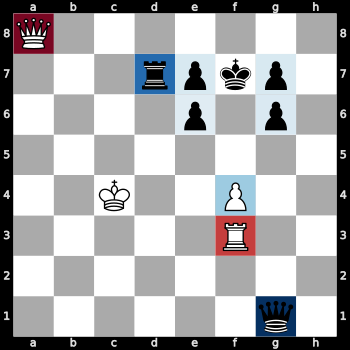

In [91]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [92]:
print(chesshap.to_latex(
    index=0
))


    \definecolor{shapg1}{HTML}{80BAD8}
\definecolor{shapf3}{HTML}{F8BDA1}
\definecolor{shapf4}{HTML}{D8E8F1}
\definecolor{shape6}{HTML}{EDF2F5}
\definecolor{shapg6}{HTML}{EAF1F4}
\definecolor{shapd7}{HTML}{A2CDE2}
\definecolor{shape7}{HTML}{E8F0F4}
\definecolor{shapg7}{HTML}{E8F0F4}
\definecolor{shapa8}{HTML}{EF9B7A}

    \newgame
    \chessboard[
      setfen=Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapg1,
  colorbackfield={g1},
  color=shapf3,
  colorbackfield={f3},
  color=shapf4,
  colorbackfield={f4},
  color=shape6,
  colorbackfield={e6},
  color=shapg6,
  colorbackfield={g6},
  color=shapd7,
  colorbackfield={d7},
  color=shape7,
  colorbackfield={e7},
  color=shapg7,
  colorbackfield={g7},
  color=shapa8,
  colorbackfield={a8}
    ]
    


In [93]:
print(chesshap.to_latex(
    index=0,
    local_range=True
))


    \definecolor{shapg1}{HTML}{053061}
\definecolor{shapf3}{HTML}{C53E3C}
\definecolor{shapf4}{HTML}{9DCAE1}
\definecolor{shape6}{HTML}{DFECF2}
\definecolor{shapg6}{HTML}{D9E9F1}
\definecolor{shapd7}{HTML}{246AAE}
\definecolor{shape7}{HTML}{D8E8F1}
\definecolor{shapg7}{HTML}{D8E8F1}
\definecolor{shapa8}{HTML}{780521}

    \newgame
    \chessboard[
      setfen=Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapg1,
  colorbackfield={g1},
  color=shapf3,
  colorbackfield={f3},
  color=shapf4,
  colorbackfield={f4},
  color=shape6,
  colorbackfield={e6},
  color=shapg6,
  colorbackfield={g6},
  color=shapd7,
  colorbackfield={d7},
  color=shape7,
  colorbackfield={e7},
  color=shapg7,
  colorbackfield={g7},
  color=shapa8,
  colorbackfield={a8}
    ]
    
